<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/Case_Study_02_Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#1. Read the dataset to the python environment.

In [8]:
data=pd.read_csv('/content/Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
# prompt: eda

data.info()
data.describe()
data.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [10]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [15]:
# prompt: nunique values

# Assuming 'data' DataFrame is already loaded as in the previous code.
for col in data.columns:
    print(f"Column '{col}': {data[col].nunique()} unique values")

Column 'Channel': 2 unique values
Column 'Region': 3 unique values
Column 'Fresh': 433 unique values
Column 'Milk': 421 unique values
Column 'Grocery': 430 unique values
Column 'Frozen': 426 unique values
Column 'Detergents_Paper': 417 unique values
Column 'Delicassen': 403 unique values


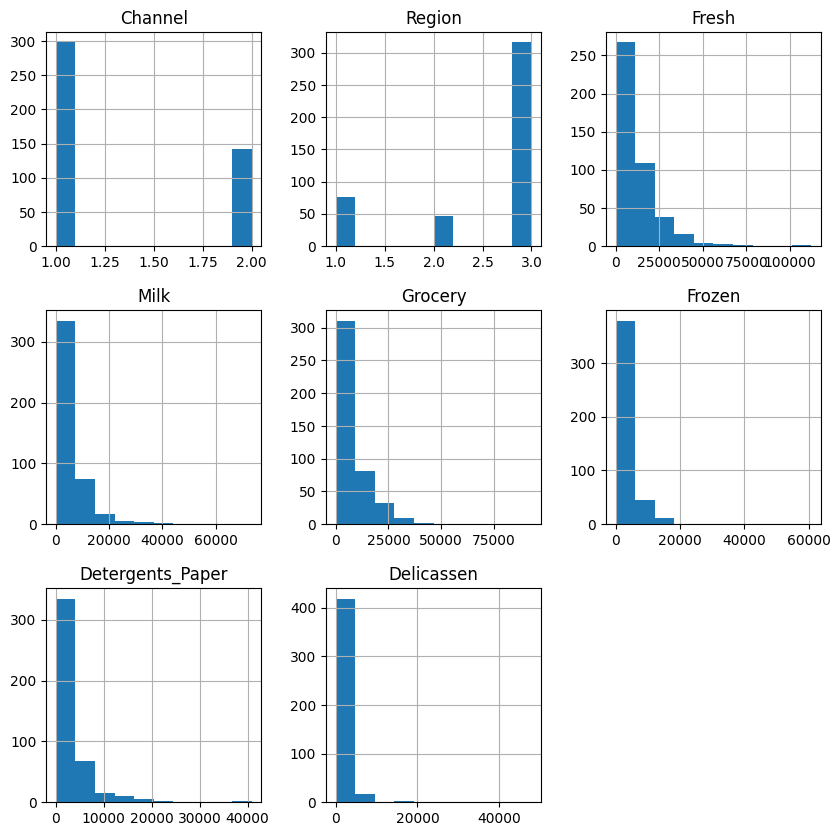

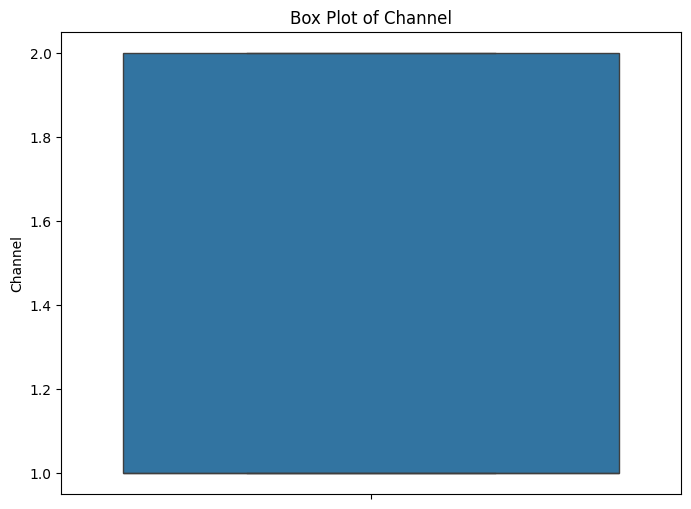

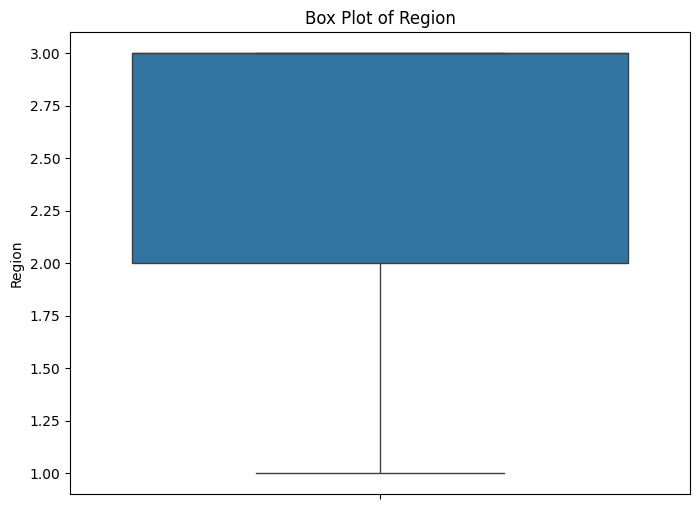

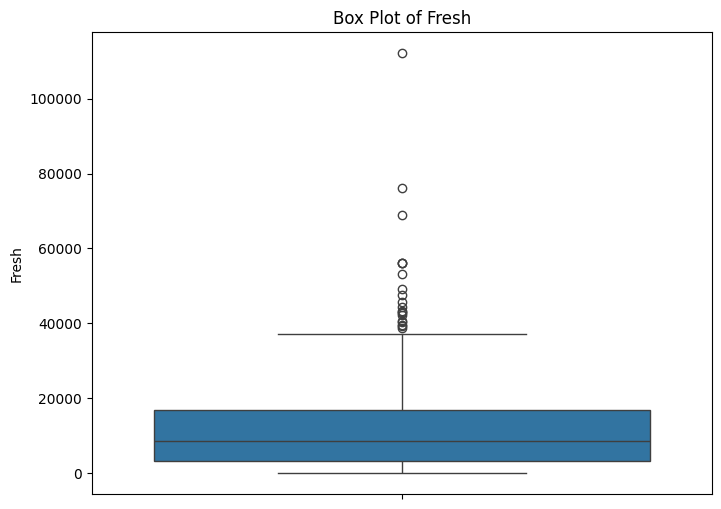

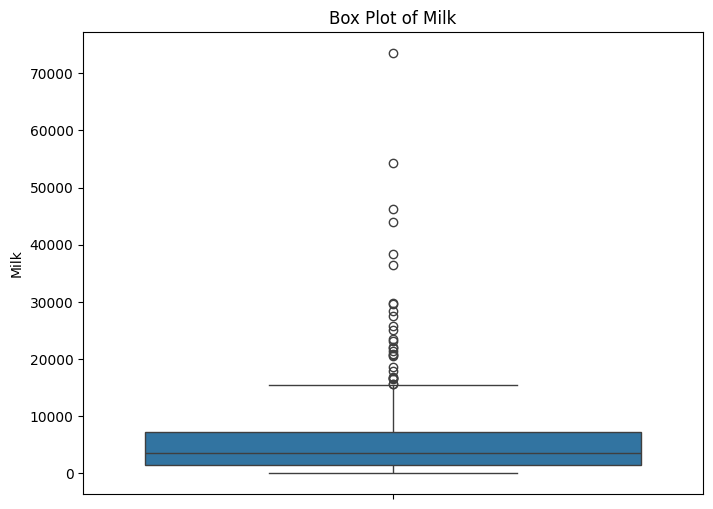

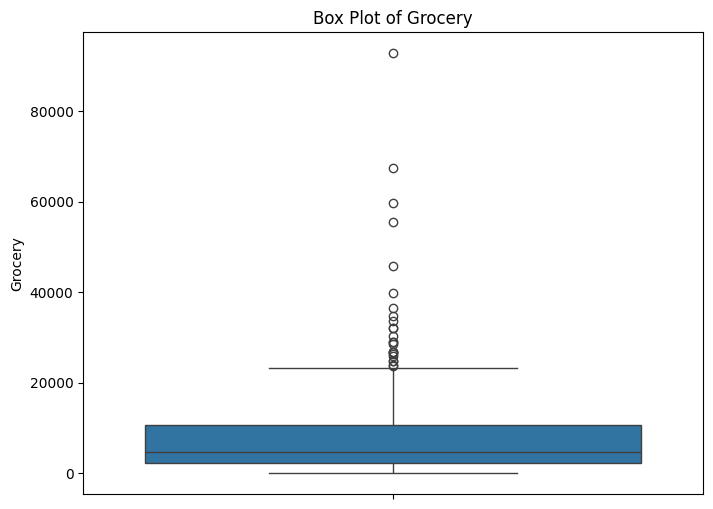

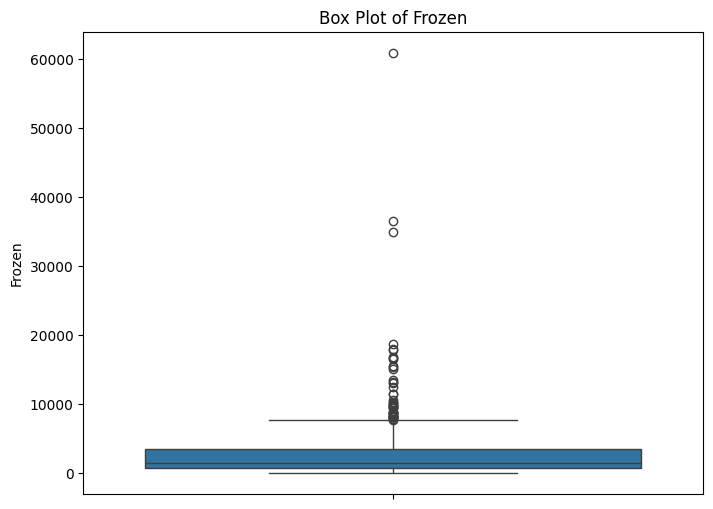

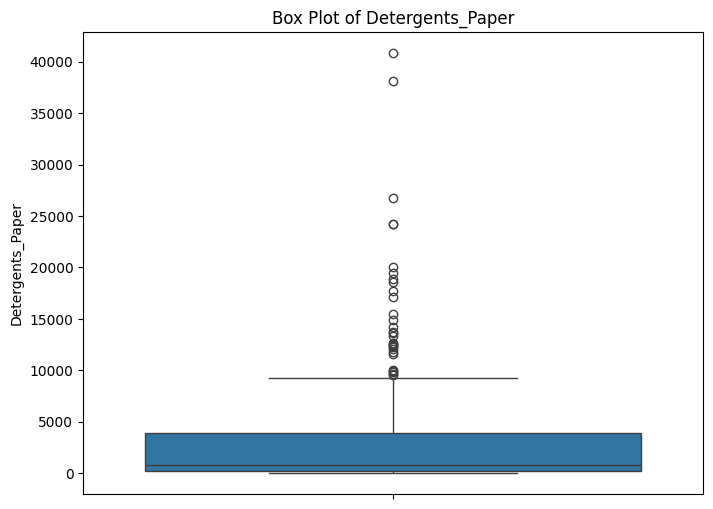

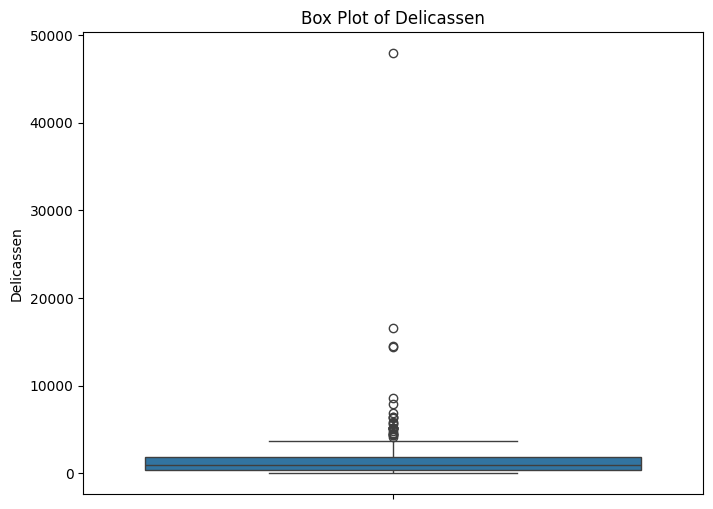

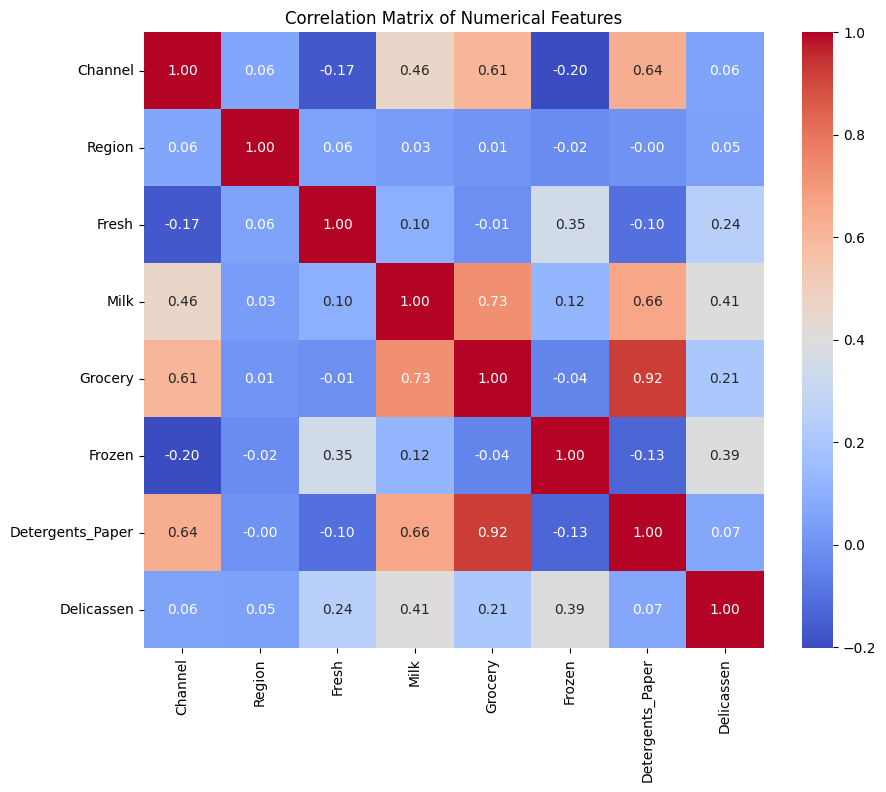

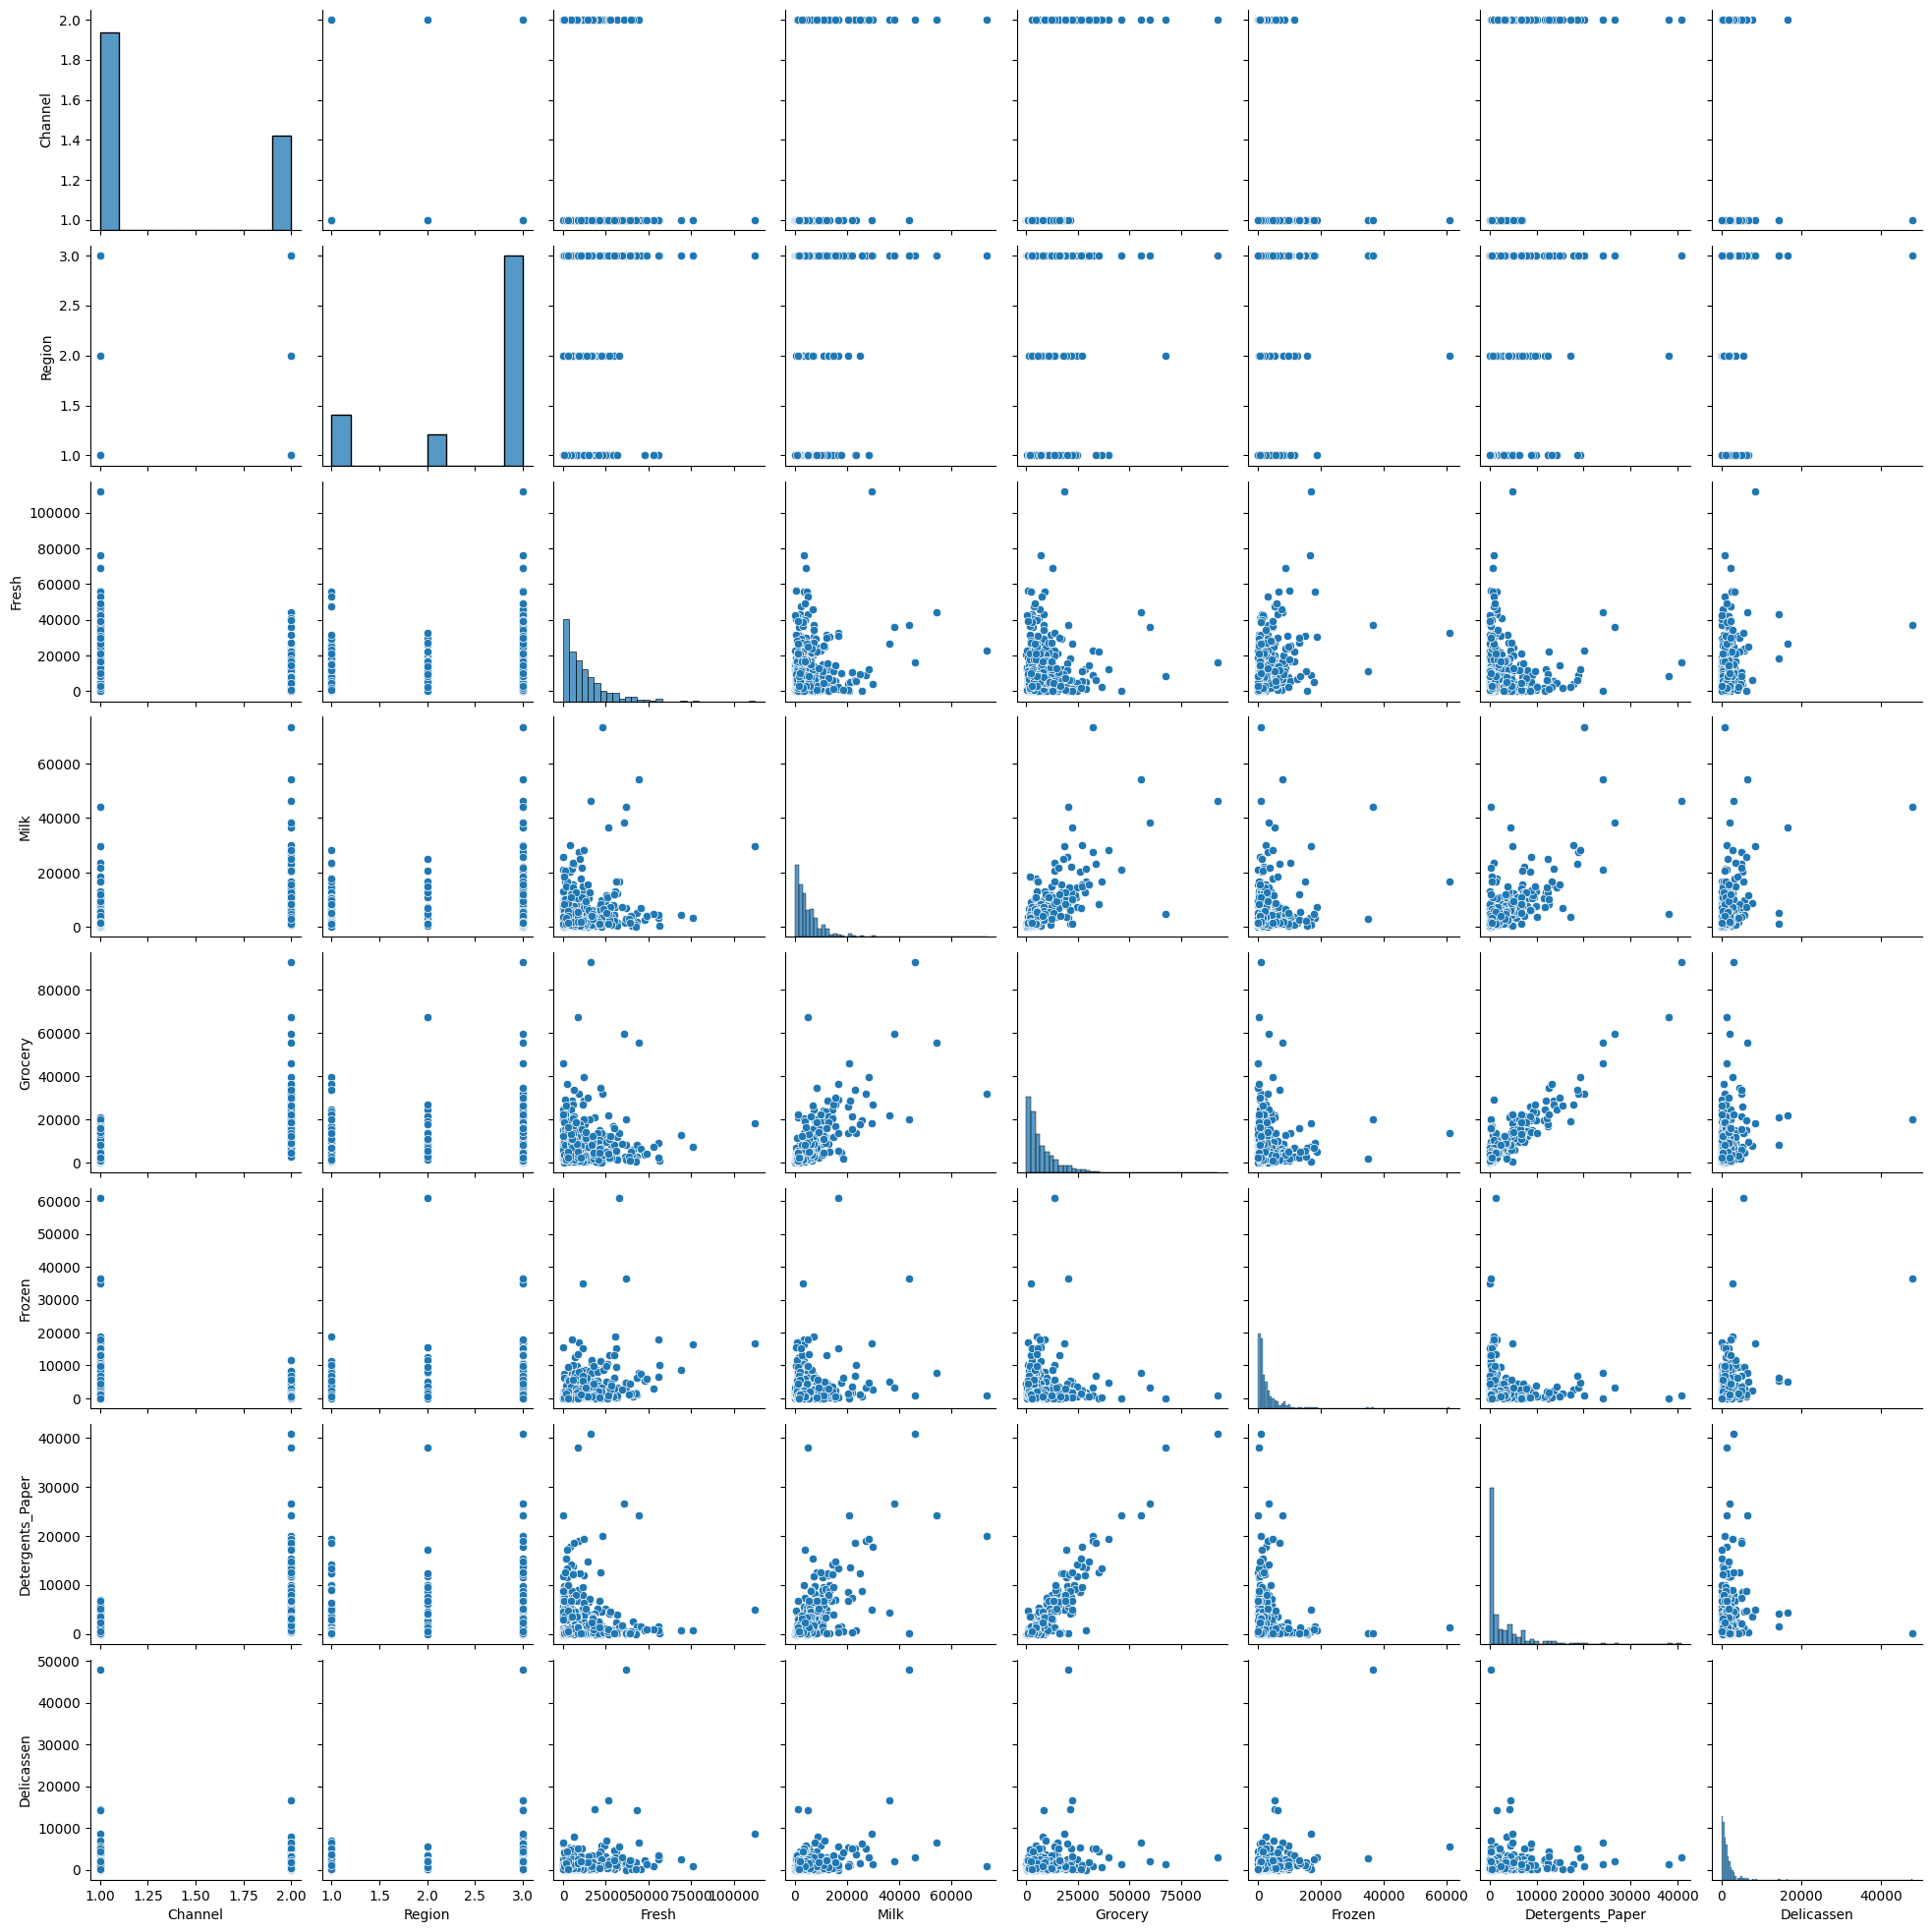

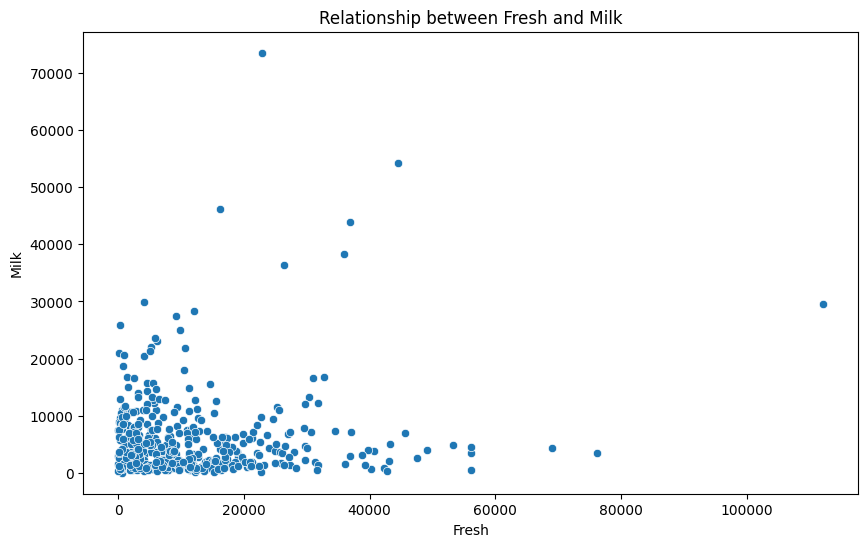

In [13]:
# prompt: EDA

# Histogram for numerical features to visualize distribution
data.hist(figsize=(10,10))
plt.show()

# Box plots for numerical features to visualize distribution and identify outliers
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Pairplot
sns.pairplot(data)
plt.show()


# Explore relationships between features (example: scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Milk', data=data)
plt.title('Relationship between Fresh and Milk')
plt.show()


<Figure size 1500x1500 with 0 Axes>

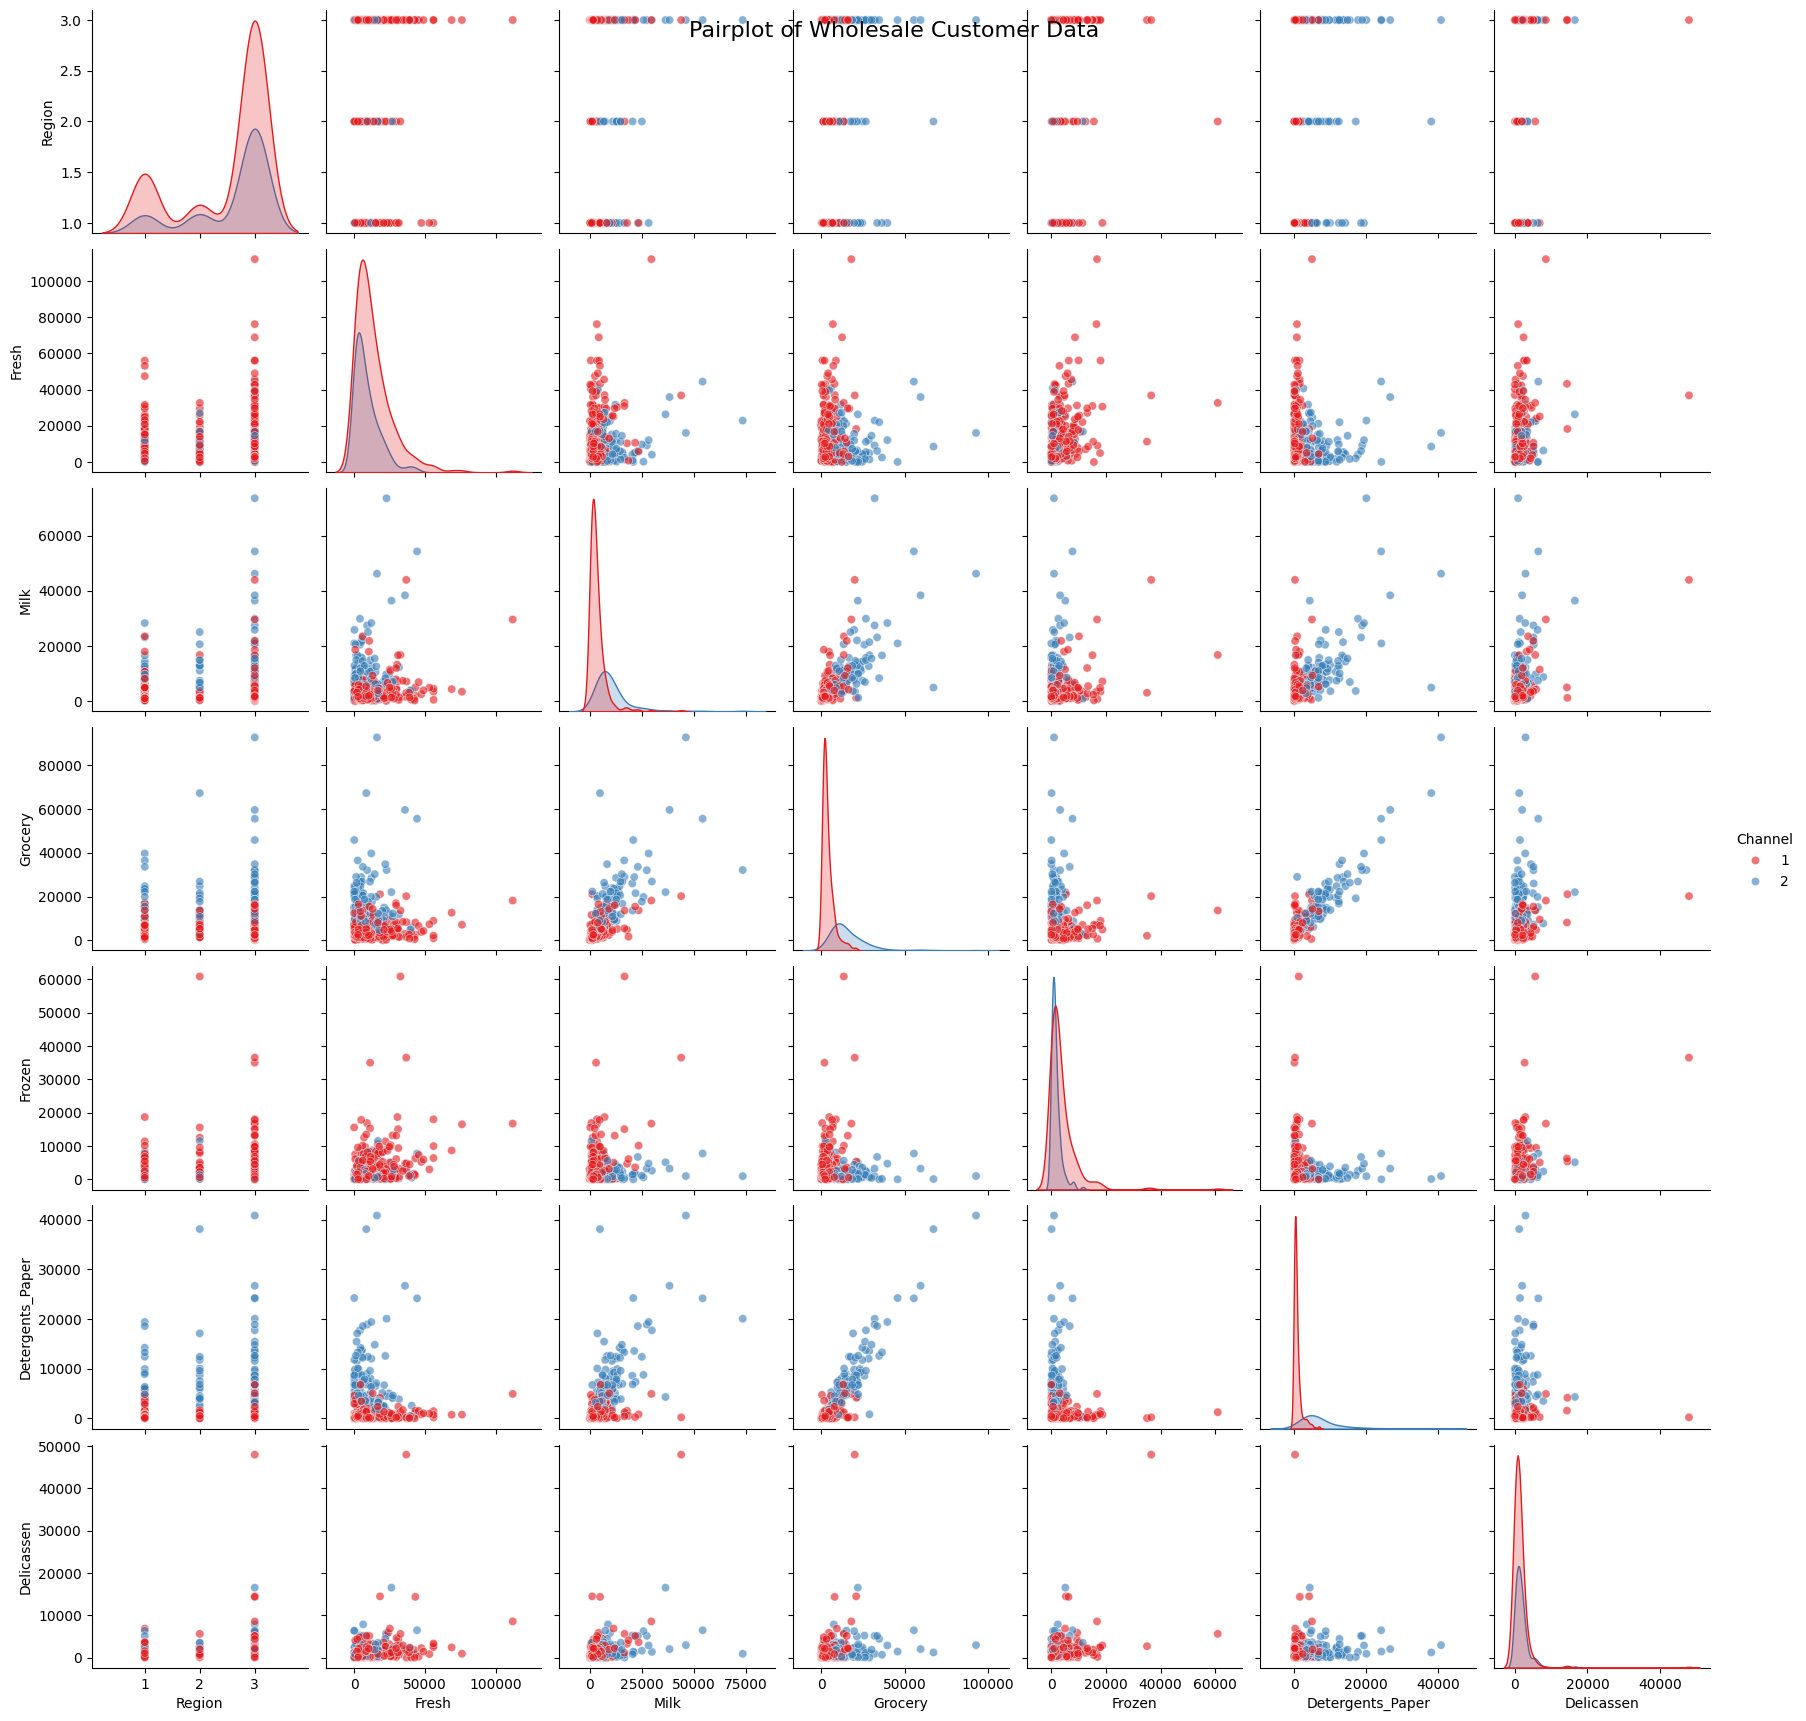

In [16]:
#  pair plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Pairplot with larger figure size and customized colors
plt.figure(figsize=(15, 15))  # Increased figure size
sns.pairplot(data, hue='Channel', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6}) # Added hue and palette, KDE for diagonal
plt.suptitle('Pairplot of Wholesale Customer Data', fontsize=16) # Added title
plt.show()

#  insights from above visual plots

## Observations from the visualizations:

## 1. Data Distribution (Histograms):
##    - Most numerical features are right-skewed, indicating a concentration of values towards the lower end with some high values. This is particularly noticeable in features like 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen'.


## 2. Outliers (Box Plots):
##    - Significant outliers are present in almost all numerical features.  The box plots visually confirm the right skewness and the presence of extreme values. Outlier treatment might be necessary for some modeling techniques.


## 3. Feature Relationships (Correlation Matrix & Pairplot):
##    - The heatmap reveals some positive correlations between features.  For example, 'Milk' and 'Grocery' show a strong positive correlation, suggesting that customers who buy more milk tend to buy more groceries. Similar positive correlations are observed between 'Grocery' and 'Detergents_Paper', 'Milk' and 'Detergents_Paper', and 'Frozen' and 'Grocery'.
#3    - Pairplot visually confirms these relationships and helps to better visualize the distribution of data points across feature combinations. It provides more insight than just the correlation coefficient by showing the actual data point scattering.


## 4. Specific Feature Relationships (Scatterplot):
#3  - The example scatter plot of 'Fresh' vs. 'Milk' shows a somewhat scattered relationship with no very clear linear trend. This visualization helps determine whether features have a linear relationship, which can inform feature engineering or model selection.


## Overall Summary:
## The dataset has a few features that are highly correlated.  There are also prominent outliers across several features.  Feature scaling or transformation might be needed to improve model performance. Careful consideration of outliers and their impact on the model is needed.  The right-skewed distribution of several variables also suggests transformations like log-transformation might be beneficial before applying certain machine learning algorithms.  The pairplot allows further exploration of the relationships between all features pairwise.

#2.  Try out different clustering models in the Whole sale customer dataset.

K-Means Silhouette Score: 0.3567685389017652
Agglomerative Clustering Silhouette Score: 0.3600234023958461
DBSCAN Silhouette Score: 0.3426999564666652


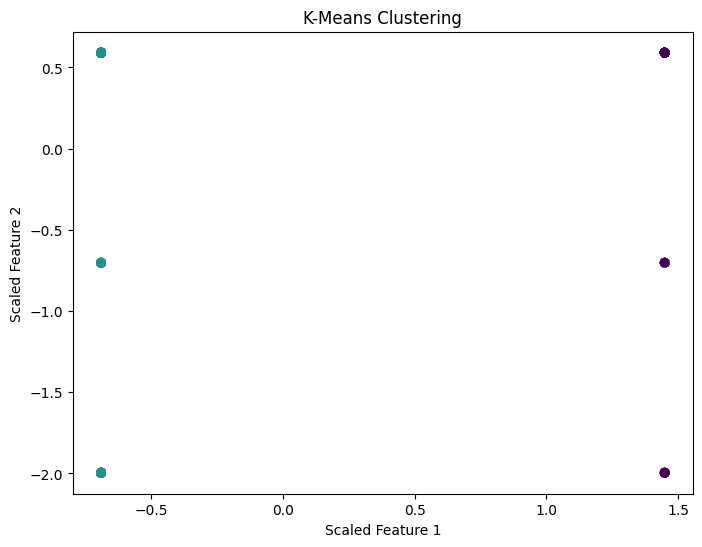

In [17]:
# prompt: different clustering methods

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and preprocessing) ...

# Feature Scaling (Important for distance-based clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change n_clusters
kmeans_labels = kmeans.fit_predict(scaled_data)
print(f"K-Means Silhouette Score: {silhouette_score(scaled_data, kmeans_labels)}")

# Visualization (Example: K-Means)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis') # Plot clusters
plt.title('K-Means Clustering')
plt.xlabel('Scaled Feature 1') # Add labels
plt.ylabel('Scaled Feature 2') # Add labels
plt.show()


Agglomerative Clustering Silhouette Score: 0.3600234023958461


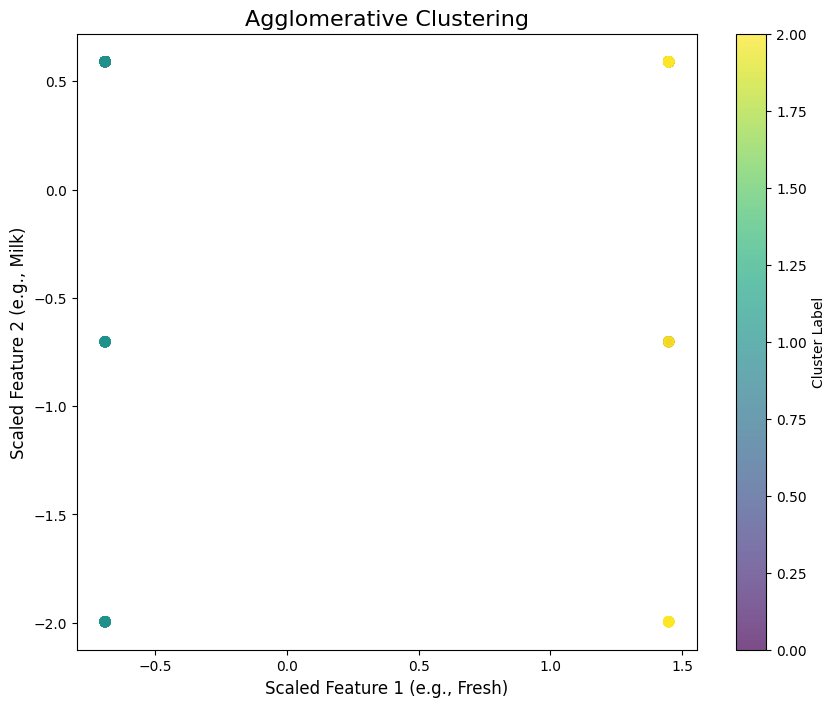

In [19]:
# prompt: agglomerative clustering and plot colourfully

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # You can change n_clusters
agg_labels = agg_clustering.fit_predict(scaled_data)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_score(scaled_data, agg_labels)}")

# Visualization with colorful scatter plot and improved labels
plt.figure(figsize=(10, 8))  # Adjust figure size as needed


plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.7)  # Adjust marker size and transparency

plt.title('Agglomerative Clustering', fontsize=16)
plt.xlabel('Scaled Feature 1 (e.g., Fresh)', fontsize=12)  # More descriptive labels
plt.ylabel('Scaled Feature 2 (e.g., Milk)', fontsize=12)  # More descriptive labels

# Add a colorbar for better interpretation of the cluster assignments
plt.colorbar(label='Cluster Label')

# Optionally add cluster centers (if applicable to the algorithm):
# Example for KMeans: plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.show()

In [18]:

agg_clustering = AgglomerativeClustering(n_clusters=3)  # You can change n_clusters
agg_labels = agg_clustering.fit_predict(scaled_data)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_score(scaled_data, agg_labels)}")

Agglomerative Clustering Silhouette Score: 0.3600234023958461


In [21]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_data)
# Handle cases where DBSCAN might not assign all points to a cluster
if len(np.unique(dbscan_labels)) > 1: # Check if DBSCAN found clusters
  print(f"DBSCAN Silhouette Score: {silhouette_score(scaled_data, dbscan_labels)}")
else:
  print("DBSCAN did not form any meaningful clusters. Try adjusting parameters.")
# DBSCAN Clustering

DBSCAN Silhouette Score: 0.3426999564666652


#3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

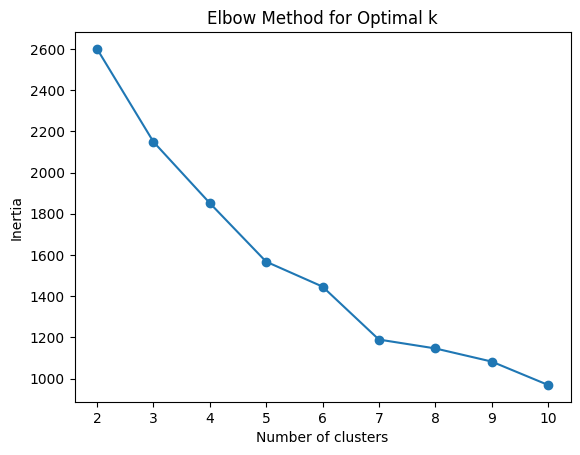

Optimal K-Means Silhouette Score: 0.3567685389017652


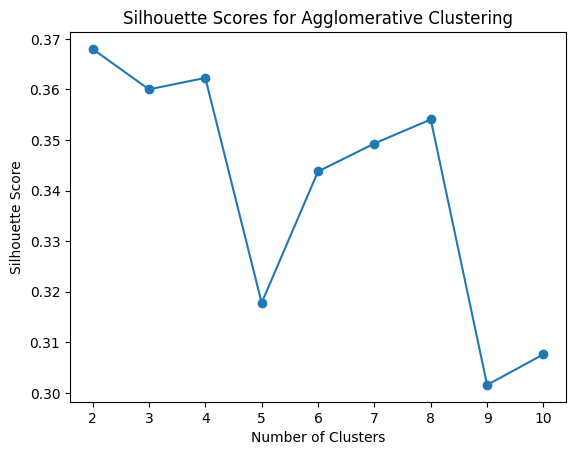

Optimal Agglomerative Clustering Silhouette Score: 0.3680209405194812
Optimal DBSCAN Silhouette Score: 0.11679128719375913


In [22]:
# prompt: 3. Find the optimum number of clusters in each model and create the model with
# the optimum number of clusters.

# Find optimal number of clusters for KMeans
kmeans_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_scores.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(2, 11), kmeans_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal k (e.g., k=3)
optimal_k = 3  # Replace with your observation from the elbow method plot
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal_labels = kmeans_optimal.fit_predict(scaled_data)
print(f"Optimal K-Means Silhouette Score: {silhouette_score(scaled_data, kmeans_optimal_labels)}")


# Find optimal number of clusters for Agglomerative Clustering
agg_scores = []
for i in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=i)
    agg_labels = agg_clustering.fit_predict(scaled_data)
    agg_scores.append(silhouette_score(scaled_data, agg_labels))

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 11), agg_scores, marker='o')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters based on the highest silhouette score
optimal_agg_clusters = np.argmax(agg_scores) + 2 # Add 2 because range starts from 2

agg_clustering_optimal = AgglomerativeClustering(n_clusters=optimal_agg_clusters)
agg_labels_optimal = agg_clustering_optimal.fit_predict(scaled_data)
print(f"Optimal Agglomerative Clustering Silhouette Score: {silhouette_score(scaled_data, agg_labels_optimal)}")

# Example with adjusted parameters
dbscan_optimal = DBSCAN(eps=0.8, min_samples=10) # Experiment with eps and min_samples
dbscan_optimal_labels = dbscan_optimal.fit_predict(scaled_data)

if len(np.unique(dbscan_optimal_labels)) > 1:
    print(f"Optimal DBSCAN Silhouette Score: {silhouette_score(scaled_data, dbscan_optimal_labels)}")
else:
    print("DBSCAN did not form any meaningful clusters. Try adjusting parameters.")

#4. Perform DBSCAN Clustering

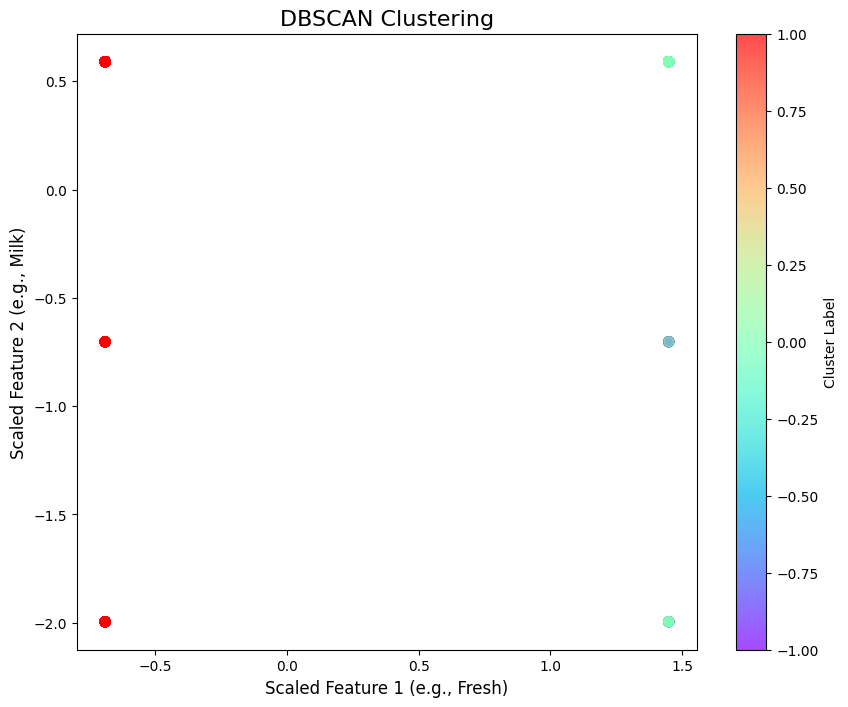

In [20]:
# DBSCAN Clustering visualise

import matplotlib.pyplot as plt

# Visualization with colorful scatter plot and improved labels for DBSCAN
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

# Use a different colormap for better visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='rainbow', s=50, alpha=0.7)

plt.title('DBSCAN Clustering', fontsize=16)
plt.xlabel('Scaled Feature 1 (e.g., Fresh)', fontsize=12)
plt.ylabel('Scaled Feature 2 (e.g., Milk)', fontsize=12)

# Add a colorbar for better interpretation of the cluster assignments
plt.colorbar(label='Cluster Label')

plt.show()

Best DBSCAN parameters: eps=1.9999999999999996, min_samples=5, silhouette score=0.3640085932003274


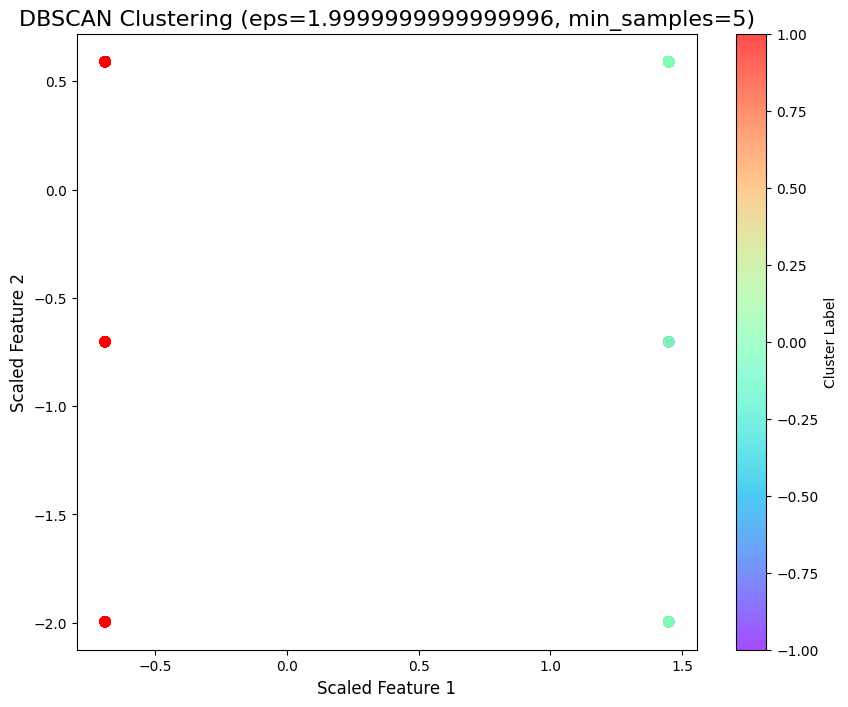

In [23]:
# Tuning DBSCAN with silhouette score
best_score = -1
best_eps = 0
best_min_samples = 0

for eps in np.arange(0.5, 2.1, 0.1):  # Explore eps values
    for min_samples in range(5, 21, 2): # Explore min_samples values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        # Check if DBSCAN found more than one cluster
        if len(np.unique(labels)) > 1:
            score = silhouette_score(scaled_data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_score}")

# Train DBSCAN with the best parameters
dbscan_optimal = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_optimal_labels = dbscan_optimal.fit_predict(scaled_data)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_optimal_labels, cmap='rainbow', s=50, alpha=0.7)
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})', fontsize=16)
plt.xlabel('Scaled Feature 1', fontsize=12)
plt.ylabel('Scaled Feature 2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.show()

#  4. Also perform PCA for Dimensionality reduction.

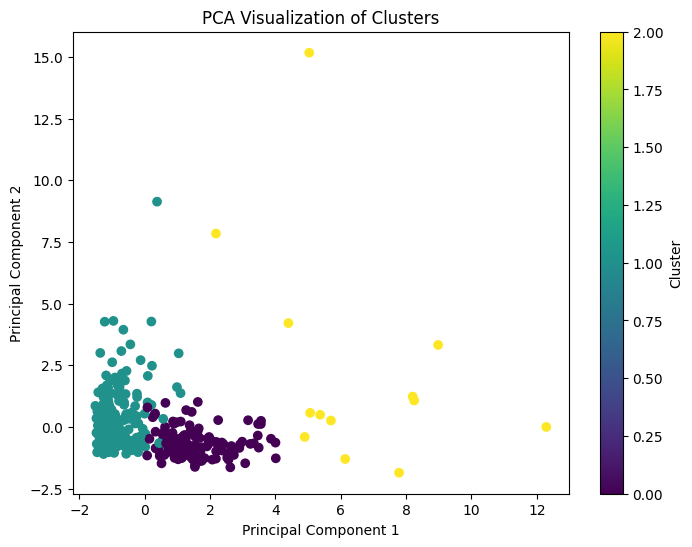

Explained Variance Ratio: [0.38750123 0.22374588]
Total Explained Variance: 0.6112471086263148


In [24]:
# prompt: 4. Also perform PCA for Dimensionality reduction.

from sklearn.decomposition import PCA

# Apply PCA with 2 components (you can adjust the number of components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the PCA results (with cluster labels, if applicable)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans_optimal_labels, cmap='viridis')  # Use kmeans labels or any other
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster') #Add a colorbar to show which color corresponds to each cluster.
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Total Explained Variance: {np.sum(explained_variance_ratio)}")